In [1]:
import sys
import numpy as np
from sklearn.preprocessing import OneHotEncoder

import emachine_protein as EM
from direct_info import direct_info
from joblib import Parallel, delayed

import timeit
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(1)

In [3]:
pfam_id = 'PF00200'
#pfam_id = sys.argv[1]

s0 = np.loadtxt('../pfam_50_80pos/%s_s0.txt'%(pfam_id)).astype(int)
print(s0.shape)

(4190, 50)


In [4]:
n_var = s0.shape[1]
mx = np.array([len(np.unique(s0[:,i])) for i in range(n_var)])
mx_cumsum = np.insert(mx.cumsum(),0,0)
i1i2 = np.stack([mx_cumsum[:-1],mx_cumsum[1:]]).T 

mx_sum = mx.sum()

In [5]:
onehot_encoder = OneHotEncoder(sparse=False,categories='auto')
#onehot_encoder = OneHotEncoder(sparse=False)

s = onehot_encoder.fit_transform(s0)
print(s.shape)

(4190, 677)


In [6]:
ops = EM.operators(s,n_var,i1i2,mx)
print(ops.shape)

(4190, 224846)


In [7]:
l1 = 0.01
print('l1:',l1)

start_time = timeit.default_timer()
eps_list = np.linspace(0.1,1.,19)
n_eps = len(eps_list)
res = Parallel(n_jobs = n_eps)(delayed(EM.fit)\
        (ops,l1=l1,eps=eps,max_iter=100)\
        for eps in eps_list)

run_time = timeit.default_timer() - start_time
print('run time:',run_time)

w_eps = np.array([res[i][0] for i in range(len(res))])
e_eps = np.array([res[i][1] for i in range(len(res))])

l1: 0.01
run time: 1268.8230735329853


In [11]:
w_eps.shape

(19, 224846)

In [12]:
e_eps.shape

(19, 100)

In [15]:
e_eps[10]

array([   -21.21024596, -11384.9499939 ,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,  

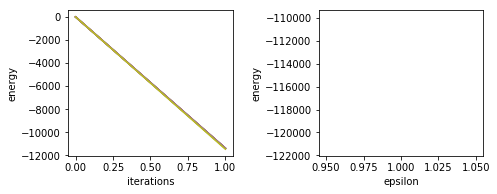

In [8]:
nx,ny = 2,1
nfig = nx*ny
fig, ax = plt.subplots(ny,nx,figsize=(nx*3.5,ny*2.8))
for i in range(9):
    ax[0].plot(e_eps[int(2*i)])

ax[1].plot(eps_list,e_eps[:,-1])
ax[0].set_ylabel('energy')
ax[0].set_xlabel('iterations')
ax[1].set_ylabel('energy')
ax[1].set_xlabel('epsilon')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()